In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='Sales', ylabel='count'>

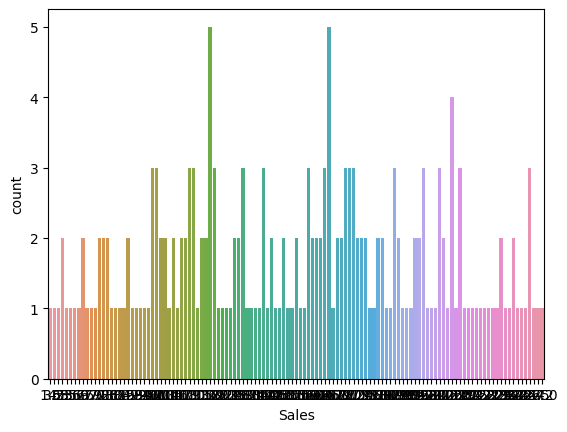

In [ ]:
sns.countplot(data=df,x='Sales')

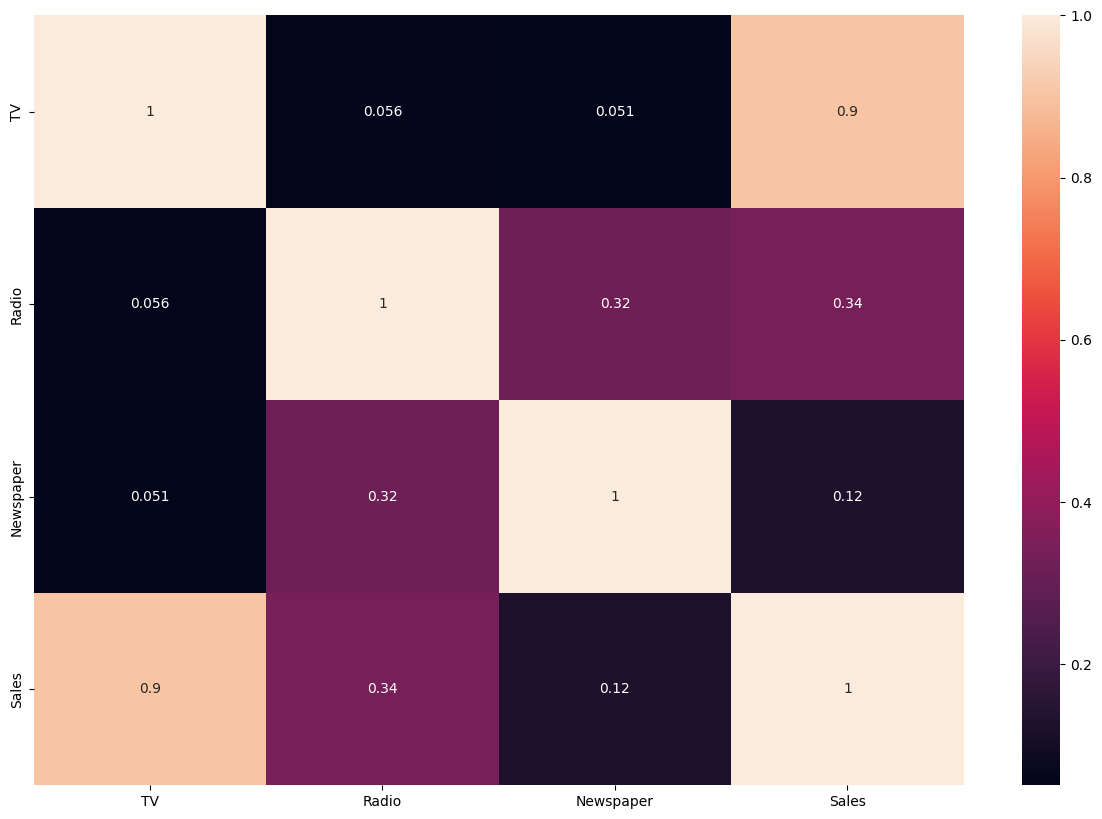

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
X = df.drop(["Sales"], axis = 1)
y = df["Sales"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(140, 3) (140,)
(60, 3) (60,)


In [ ]:
x_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
pred = regressor.predict(x_test)

In [ ]:
score = regressor.score(x_test,pred)
print('Acccuracy: ',score)

Acccuracy:  1.0


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, y, cv=10)

array([0.84889341, 0.87228912, 0.923988  , 0.8711338 , 0.90321706,
       0.93065754, 0.89029878, 0.86273123, 0.93730705, 0.91148819])

In [ ]:
data = pd.DataFrame(data={"Predicted Sales": pred.flatten()})
print(data)

    Predicted Sales
0              18.0
1              23.8
2              19.6
3               5.3
4              23.8
5              15.3
6              22.6
7               9.7
8              17.8
9              17.1
10              8.8
11              9.7
12             16.7
13              3.2
14             13.2
15             17.9
16              4.8
17             17.3
18             11.9
19             20.9
20             19.6
21             15.3
22             10.8
23             21.8
24              9.7
25              9.7
26             22.6
27             13.2
28             11.5
29              4.8
30             15.5
31             13.2
32             23.8
33             12.0
34             20.1
35             20.9
36             10.4
37             19.6
38             13.2
39              6.6
40             13.2
41             17.6
42              9.6
43              9.7
44             17.2
45              9.7
46             12.3
47             10.3
48             13.2
